# 交通数据质量控制作业
#### 2231305 李泓辰

## 数据预处理
#### 读取数据

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/data.txt")
df.head()

,FSTR_LOOPGROUPID,FDT_TIME,FINT_VOLUME,FINT_SPEED,FINT_OCCUPY,FINT_VH,FSTR_VALIDITY,FINT_LV,FINT_MV,FINT_SV,FINT_LS,FINT_MS,FINT_SS
0,611309270020604,2010-03-01 00:00:00,0,0,0,0,valid,0,0,0,0,0,0
1,611309270020604,2010-03-01 00:00:20,0,0,0,0,valid,0,0,0,0,0,0
2,611309270020604,2010-03-01 00:00:40,0,0,0,0,valid,0,0,0,0,0,0
3,611309270020604,2010-03-01 00:01:00,0,0,0,0,valid,0,0,0,0,0,0
4,611309270020604,2010-03-01 00:01:20,0,0,0,0,valid,0,0,0,0,0,0


#### 清洗掉invalid不可用数据

In [3]:
dfClean = pd.DataFrame(columns=df.columns)
for i, row in df.iterrows():
    if row["FSTR_VALIDITY"] == "valid":
        dfClean.loc[len(dfClean)]=row
df = dfClean
df.head()

,FSTR_LOOPGROUPID,FDT_TIME,FINT_VOLUME,FINT_SPEED,FINT_OCCUPY,FINT_VH,FSTR_VALIDITY,FINT_LV,FINT_MV,FINT_SV,FINT_LS,FINT_MS,FINT_SS
0,611309270020604,2010-03-01 00:00:00,0,0,0,0,valid,0,0,0,0,0,0
1,611309270020604,2010-03-01 00:00:20,0,0,0,0,valid,0,0,0,0,0,0
2,611309270020604,2010-03-01 00:00:40,0,0,0,0,valid,0,0,0,0,0,0
3,611309270020604,2010-03-01 00:01:00,0,0,0,0,valid,0,0,0,0,0,0
4,611309270020604,2010-03-01 00:01:20,0,0,0,0,valid,0,0,0,0,0,0


## 问题1、2：计算每隔5分钟的流量与平均车速

In [4]:
import datetime

lastTime = datetime.datetime.strptime(df.iloc[0]["FDT_TIME"], '%Y-%m-%d %H:%M:%S')
curCarNum, curCarFlow, curSumSpeed = 0, 0, 0
dfFS = pd.DataFrame(columns=["时间", "流量", "平均车速"])
for i, row in df.iterrows():
    curDate = datetime.datetime.strptime(row["FDT_TIME"], '%Y-%m-%d %H:%M:%S')
    curCarNum += row["FINT_LV"] + row["FINT_MV"] + row["FINT_SV"]
    curCarFlow += 3.0 * row["FINT_LV"] + 2.0 * row["FINT_MV"] + row["FINT_SV"]
    curSumSpeed += row["FINT_LV"] * row["FINT_LS"] + row["FINT_MV"] * row["FINT_MS"] + row["FINT_SV"] + row["FINT_SS"]
    if (curDate - lastTime).seconds >= 300:
        if curCarNum == 0:
            dfFS.loc[len(dfFS)] = pd.Series([curDate, int(curCarFlow), 0.0], index=["时间", "流量", "平均车速"])
        else:
            dfFS.loc[len(dfFS)] = pd.Series([curDate, int(curCarFlow), curSumSpeed/curCarNum], index=["时间", "流量", "平均车速"])
        curCarNum, curCarFlow, curSumSpeed = 0, 0, 0
        lastTime = curDate
if curCarNum == 0:
        dfFS.loc[len(dfFS)] = pd.Series([curDate, int(curCarFlow), 0.0], index=["时间", "流量", "平均车速"])
else:
    dfFS.loc[len(dfFS)] = pd.Series([curDate, int(curCarFlow), curSumSpeed/curCarNum], index=["时间", "流量", "平均车速"])
dfFS

,时间,流量,平均车速
0,2010-03-01 00:05:00,2,80.0
1,2010-03-01 00:10:00,3,86.0
2,2010-03-01 00:15:00,5,76.8
3,2010-03-01 00:20:00,2,88.0
4,2010-03-01 00:25:00,0,0.0
...,...,...,...
283,2010-03-01 23:40:00,3,75.0
284,2010-03-01 23:45:00,3,88.333333
285,2010-03-01 23:50:00,2,43.5
286,2010-03-01 23:55:00,3,79.333333


#### 数据可视化展示

<Figure size 432x288 with 0 Axes>

P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


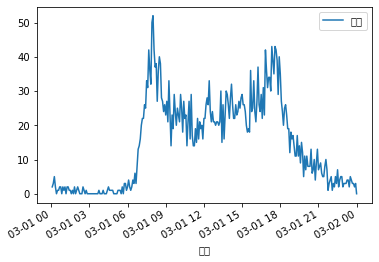

In [5]:
from matplotlib import pyplot as plt
fig = plt.figure()
fig = dfFS.plot(x="时间", y="流量")

<AxesSubplot:xlabel='时间'>

P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\Anaconda\envs\learning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from current font.
  fig.canvas.print_figure(b

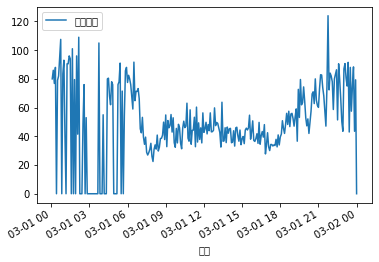

In [6]:
dfFS.plot(x="时间", y="平均车速")
fig

#### 移动平均法
${S_{t}=\frac{\sum_{i=t-1}^{t-n} X_{i}}{n} \text {, 取 } \mathrm{n}=5}$
${S_{t} \text { 为 } t \text { 时刻丢失样本中的待修补数据; } X_{i} \text { 为 }(t-1) \text { 至 }(t-n) \text { 时刻采集的有效数据。 }}$

In [7]:
def calMoveAverage(dataName):
    """
    :param dataName: string
    :return:
    """
    moveAverage = []
    flowList = dfFS[dataName].values.tolist()
    for i in range(5, len(flowList)):
        temp = sum(flowList[i-5:i])
        moveAverage.append(temp/5)
    return moveAverage

#### 加权移动平均法
${S_{t}=\frac{\sum_{i=t-1}^{t-n} W_{i} X_{i}}{\sum_{i=1}^{n} W_{i}}, \text { 取 } \mathrm{n}=5, W_{t-1}=5, W_{t-2}=4, W_{t-3}=3, W_{t-2}=2, W_{t-5}=1}$

${S_{t}}$ $为$ ${\mathrm{t}}$ $时刻丢失样本中的待修补数据;$ ${X_{i}}$ $为$ ${(t-1)}$ $至$ ${(t-n)}$ $时刻采集的有效数据;$ ${W_{i}}$ $是权重值。$

In [8]:
def calWeightAverage(dataName):
    import numpy as np
    flowList = dfFS[dataName].values.tolist()
    weightAverage= []
    weight = [1, 2, 3, 4, 5]
    for i in range(5, len(flowList)):
        temp = sum(np.multiply(np.array(flowList[i-5:i]),np.array(weight)).tolist())
        weightAverage.append(temp/15)
    return weightAverage

#### 一次指数平滑法 $\alpha=0.5$
${Y_{t}=y_{t}=\alpha x_{t-1}+(1-\alpha) y_{t-1}}$

In [9]:
def calIndexAverage(dataName):
    indexAverage = []
    alpha, xt_1, yt_1 = 0.5, 0, 0
    for i, row in dfFS.iterrows():
        if i == 0:
            x1, y1 = row[dataName], row[dataName]
            indexAverage.append(y1)
            xt_1, yt_1 = x1, y1
        else:
            yt = alpha * xt_1 + (1 - alpha) * yt_1
            indexAverage.append(yt)
            xt_1, yt_1 = row[dataName], yt
    return indexAverage

#### 平均相对误差计算
$\text { AARE }=\frac{1}{n} \sum_{i=1}^{n} \frac{\left|x_{i}-y_{i}\right|}{x_{i}} \times 100 \%$

In [10]:
# 移动平均的误差
def calARRE(Dataseries, TureData):
    import math
    AARE = 0
    # flowX = TureData[5:]
    for i in range(len(Dataseries)):
        if TureData[i] == 0: continue
        AARE += math.fabs(Dataseries[i] - TureData[i]) / TureData[i]
    AARE = AARE / len(Dataseries)
    return AARE

## 问题3：5分钟流量的估计及误差分析

In [11]:
# 数据准备
flow = (dfFS["流量"].values.tolist())
flowMoveAve = calMoveAverage("流量")
flowWeightAve = calWeightAverage("流量")
flowIndexAve = calIndexAverage("流量")

flowAAREMove = calARRE(flowMoveAve, flow[5:])
flowAAREWeight = calARRE(flowWeightAve, flow[5:])
flowAAREIndex = calARRE(flowIndexAve[5:], flow[5:])
print(flowAAREMove, flowAAREWeight, flowAAREIndex)

0.28293079317846836 0.27756655137069425 0.28345320492133913


#### 三种方法估算流量ARRE误差
|          | 移动平均 | 加权移动平均 | 一次指数平滑 |
|----------|---|----|----|
| 流量估算误差   | 0.2839 | 0.2786|0.2845|
| 平均车速估算误差 | 0.1841 | 0.1829 | 0.1884 |

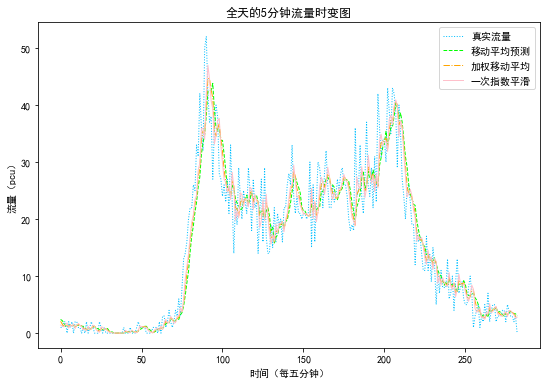

In [12]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

x = range(len(flow[5:]))
fig=plt.figure(figsize=(9, 6))
plt.plot(x,flow[5:],lw=1,ls=':',c='deepskyblue', label="真实流量")
plt.plot(x,flowMoveAve,lw=1,ls='--',c='lime', label="移动平均预测")
plt.plot(x,flowWeightAve,lw=1,ls='-.',c='orange', label="加权移动平均")
plt.plot(x,flowIndexAve[5:],lw=1,ls='-',c='pink', label="一次指数平滑")
plt.legend() # 让图例生效

plt.title("全天的5分钟流量时变图")
plt.xlabel(u"时间（每五分钟）")
plt.ylabel("流量（pcu）")

plt.savefig('./flow.jpg', dpi=600)
plt.show()

## 问题4：5分钟车速的估计及误差分析

In [13]:
# 数据准备
speed = (dfFS["平均车速"].values.tolist())
speedMoveAve = calMoveAverage("平均车速")
speedWeightAve = calWeightAverage("平均车速")
speedIndexAve = calIndexAverage("平均车速")

speedAAREMove = calARRE(speedMoveAve, speed[5:])
speedAAREWeight = calARRE(speedWeightAve, speed[5:])
speedAAREIndex = calARRE(speedIndexAve[5:], speed[5:])
print(speedAAREMove, speedAAREWeight, speedAAREIndex)

0.1841420894099411 0.182902821943817 0.18837672599584043


#### 可视化

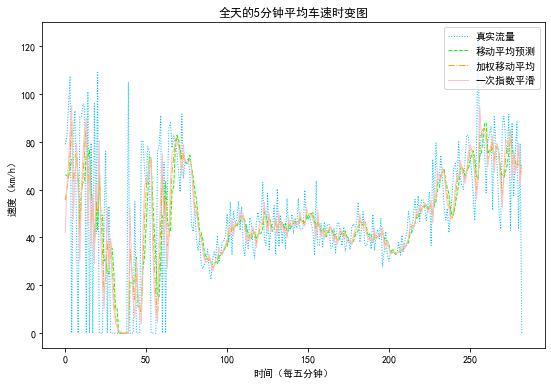

In [14]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

x = range(len(speed[5:]))
fig=plt.figure(figsize=(9, 6))
plt.plot(x,speed[5:],lw=1,ls=':',c='deepskyblue', label="真实流量")
plt.plot(x,speedMoveAve,lw=1,ls='--',c='lime', label="移动平均预测")
plt.plot(x,speedWeightAve,lw=1,ls='-.',c='orange', label="加权移动平均")
plt.plot(x,speedIndexAve[5:],lw=1,ls='-',c='pink', label="一次指数平滑")
plt.legend(loc=1)

plt.title("全天的5分钟平均车速时变图")
plt.xlabel(u"时间（每五分钟）")
plt.ylabel("速度（km/h）")

plt.savefig('./speed.jpg', dpi=600)
plt.show()